14 . Combine two overlapping images into a single panoramic image. Display the original images and the final stitched panorama.

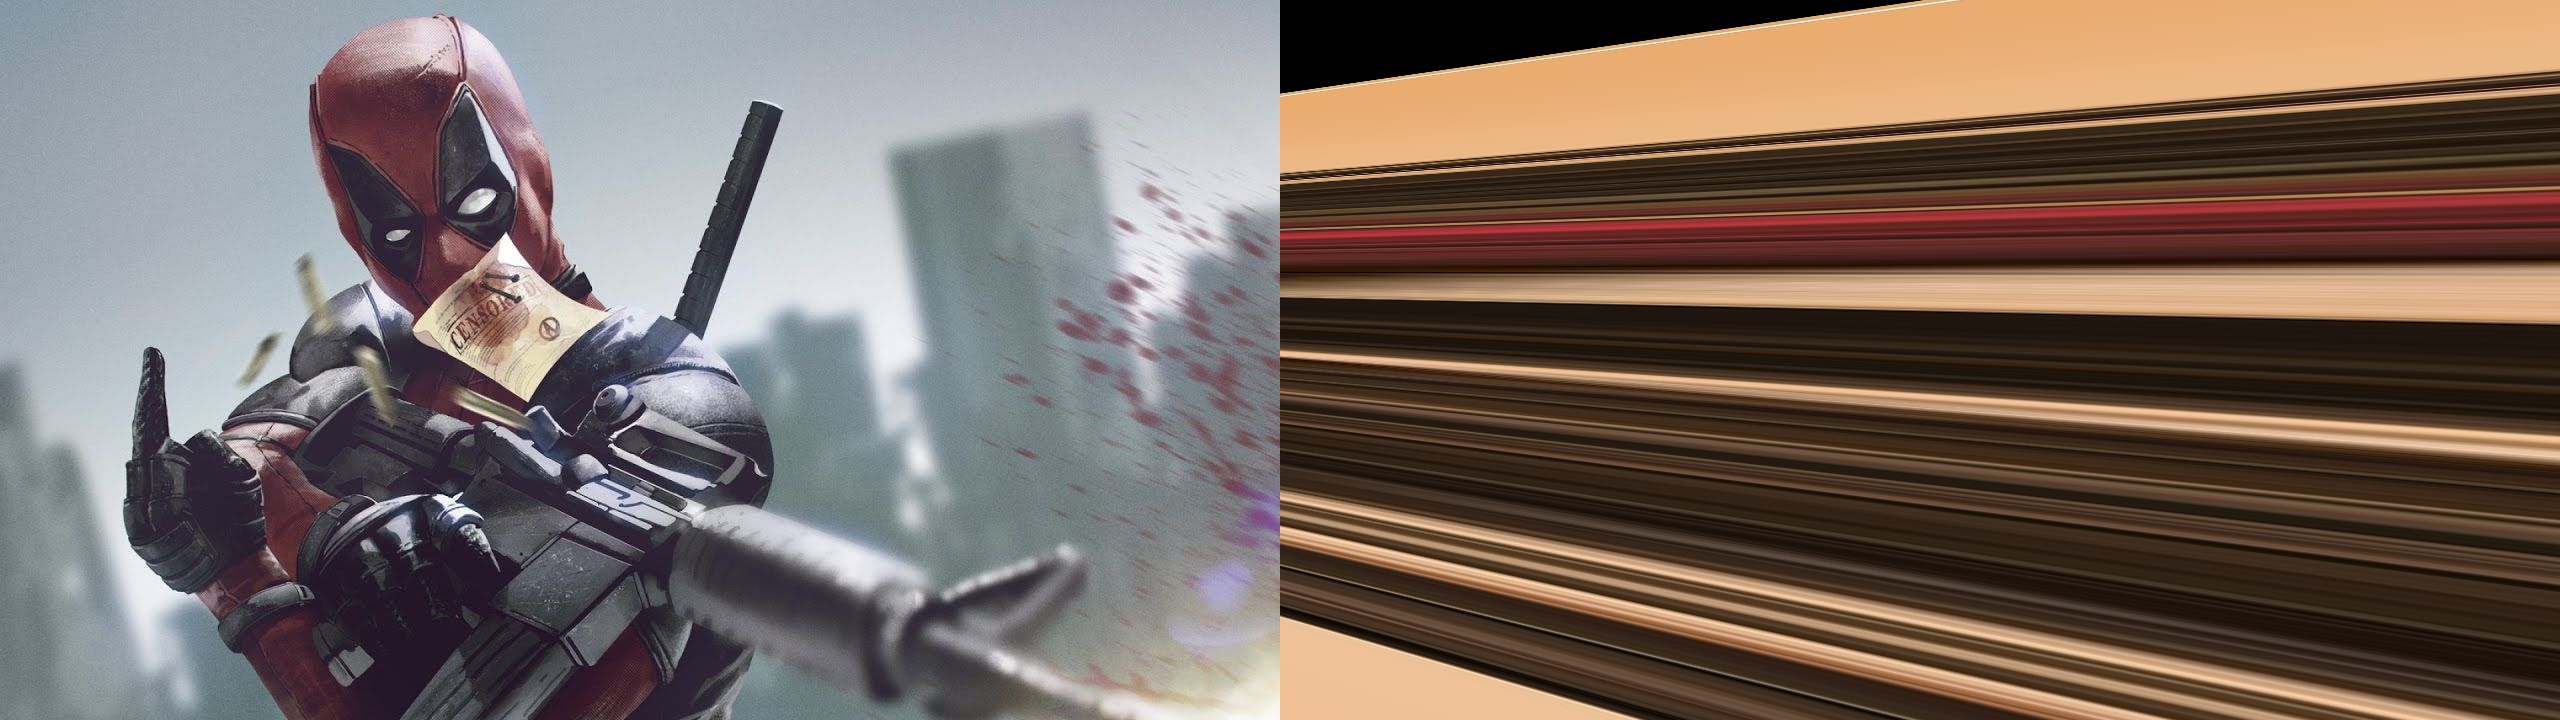

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load images
img1 = cv2.imread("/content/deadpool-wolverine-wallpaper-preview.jpg")
img2 = cv2.imread("/content/vECHyt.jpg")

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors using ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Match descriptors using BFMatcher
matches = sorted(cv2.BFMatcher(cv2.NORM_HAMMING).match(des1, des2), key=lambda x: x.distance)

# Extract matching keypoints
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography
H, _ = cv2.findHomography(src_pts, dst_pts)

# Warp image and create panorama
height, width = img2.shape[:2]
result = cv2.warpPerspective(img1, H, (width * 2, height))
result[0:height, 0:width] = img2

# Show stitched image
cv2_imshow(result)
